In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import norm
from depth.multivariate import simplicial, halfspace, simplicial, betaSkeleton
from utils.simulate_markov import simulate_arch_1_process, simulate_arch_1_process_with_shock_anomaly
from utils.markov_depth import calculate_markov_tukey_depth, calculate_markov_tukey_depth_for_trajectories, calculate_markov_depth
from utils.depth_functions import tukey_depth_depth_ar_1, tukey_depth_dimension_1
from utils.kernel_estimation import nadaraya_watson_marginal_pdf, nadaraya_watson_marginal_cdf, nadaraya_watson_marginal_cdf_direct, nadaraya_watson_average_marginal_cdf, nadaraya_watson_average_marginal_cdf_direct, nadaraya_watson_average_marginal_pdf
from utils.simulate_markov import simulate_ar1_process

In [2]:
# Set up the Seaborn style
sns.set(style="whitegrid")

In [3]:
# Fix the random seed for reproducibility 
random_seed = 7
np.random.seed(random_seed)

In [4]:
# Number of steps on each trajectory
n_steps = 100
# Number of normal trajectories to simulate
M = 100
# Number of anomalous trajectories to simulate
A = 100

In [5]:
# Parameters of the ARCH(1) process
INITIAL_VALUE = 0.5

def mean_fn(x):
    return 1 / (1 + np.exp(-x))

def volatility_fn(x):
    return norm.pdf(x + 1.2) + 1.5 * norm.pdf(x - 1.2)

In [6]:
# Simulate regular  ARCH(1) processes of the same length
random_seed +=1
regular_arch_trajectories = simulate_arch_1_process(
    n_steps=n_steps, 
    m=mean_fn, 
    sigma=volatility_fn, 
    initial_value=INITIAL_VALUE, 
    num_processes=M, 
    seed=random_seed
)

## Model 1 (Shock anomaly)

In [7]:
# Parameters of the shock anomaly
def anomalous_mean_fn(x):
    return 10*x

def anomalous_volatility_fn(x):
    return x**2

In [8]:
random_seed +=1
anomalous_shock_arch_trajectories = simulate_arch_1_process_with_shock_anomaly(
    n_steps=n_steps, 
    m=mean_fn, 
    sigma=volatility_fn, 
    anomalous_m=anomalous_mean_fn,
    anomalous_sigma=anomalous_volatility_fn,
    initial_value=INITIAL_VALUE, 
    num_processes=A, 
    anomaly_percent=0.02,
    seed=random_seed
)

We plot the regular trajectories and the anomalous trajectories in the same plot.

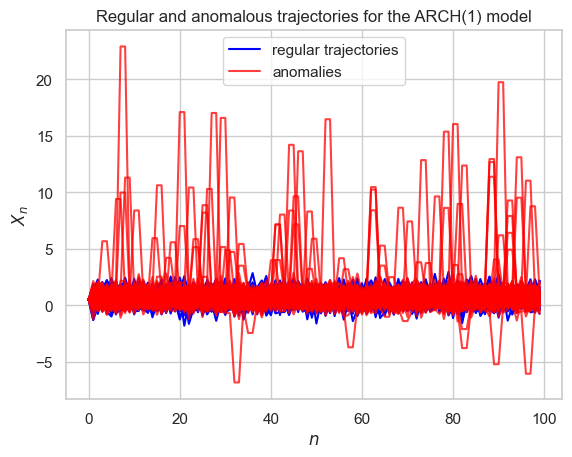

In [9]:
# Plot regular trajectories
for i, trajectory in enumerate(regular_arch_trajectories):
    if i == 0:
        plt.plot(trajectory, color="blue", label="regular trajectories")
    else:
        plt.plot(trajectory, color="blue")

for i, trajectory in enumerate(anomalous_shock_arch_trajectories):
    if i == 0:
        plt.plot(trajectory, color="red", label="anomalies", alpha=0.75)
    else:
        plt.plot(trajectory, color="red", alpha=0.75)
plt.title("Regular and anomalous trajectories for the ARCH(1) model")
plt.legend()
plt.xlabel(r"$n$")
plt.ylabel(r"$X_n$")
plt.show()

We select one anomalous trajectory to plot it alongside the regular trajectories.

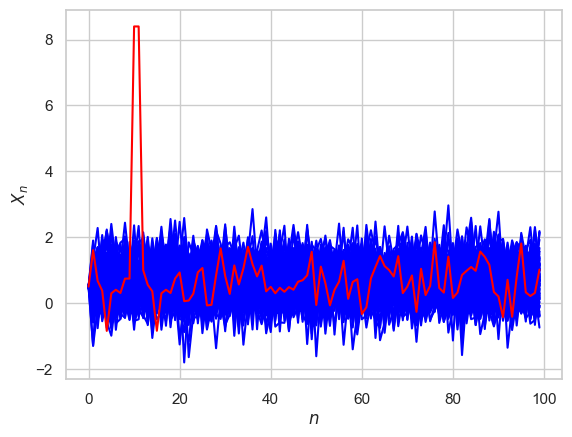

In [10]:
# Plot regular trajectories
for i, trajectory in enumerate(regular_arch_trajectories):
    plt.plot(trajectory, color="blue")

plt.plot(anomalous_shock_arch_trajectories[1], color="red", alpha=1)

plt.xlabel(r"$n$")
plt.ylabel(r"$X_n$")
plt.show()

## Model 2 (increasing volatility)

In [11]:
def increasing_volatility_fn(x):
    return 0.5*np.sqrt(x**2+1)

In [12]:
# Simulate anomalous process
random_seed +=1
anomalous_increasing_volatility_arch_trajectories = simulate_arch_1_process(
    n_steps=n_steps, 
    m=mean_fn, 
    sigma=increasing_volatility_fn, 
    initial_value=INITIAL_VALUE, 
    num_processes=A,
    seed=random_seed,
)

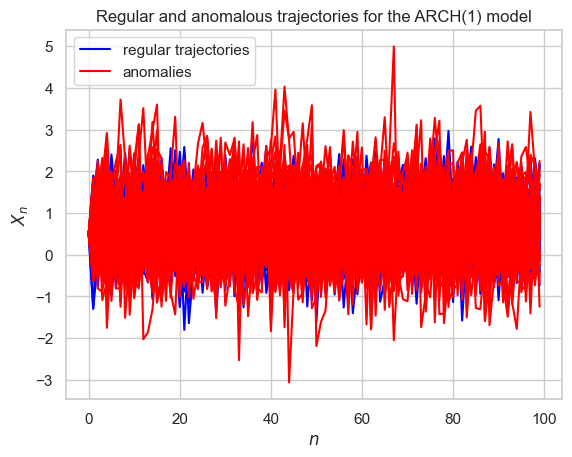

In [13]:
# Plot regular trajectories
for i, trajectory in enumerate(regular_arch_trajectories):
    if i == 0:
        plt.plot(trajectory, color="blue", label="regular trajectories")
    else:
        plt.plot(trajectory, color="blue")

for i, trajectory in enumerate(anomalous_increasing_volatility_arch_trajectories):
    if i == 0:
        plt.plot(trajectory, color="red", label="anomalies", alpha=1)
    else:
        plt.plot(trajectory, color="red", alpha=1)
plt.title("Regular and anomalous trajectories for the ARCH(1) model")
plt.legend()
plt.xlabel(r"$n$")
plt.ylabel(r"$X_n$")
plt.show()

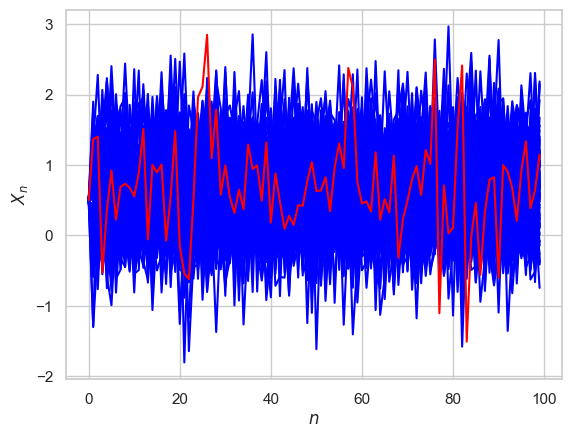

In [14]:
# Plot regular trajectories
for i, trajectory in enumerate(regular_arch_trajectories):
    plt.plot(trajectory, color="blue")

plt.plot(anomalous_increasing_volatility_arch_trajectories[0], color="red", alpha=1)

plt.xlabel(r"$n$")
plt.ylabel(r"$X_n$")
plt.show()

## Model 3 (Deterministic mean)

In [15]:
def constant_mean(x):
    return 2

In [16]:
# Simulate anomalous process
random_seed +=1
anomalous_constant_mean_arch_trajectories = simulate_arch_1_process(
    n_steps=n_steps, 
    m=constant_mean, 
    sigma=volatility_fn, 
    initial_value=INITIAL_VALUE, 
    num_processes=A,
    seed=random_seed,
)

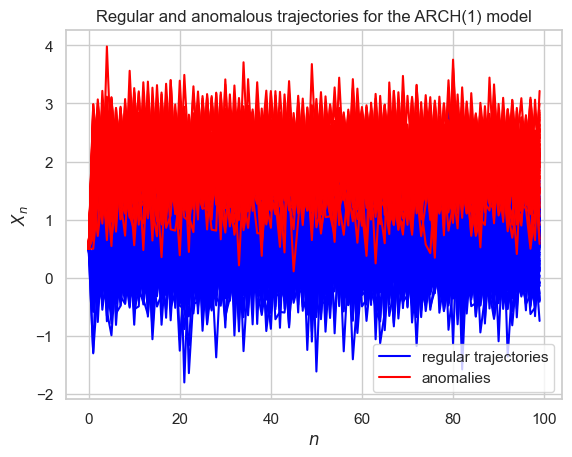

In [17]:
# Plot regular trajectories
for i, trajectory in enumerate(regular_arch_trajectories):
    if i == 0:
        plt.plot(trajectory, color="blue", label="regular trajectories")
    else:
        plt.plot(trajectory, color="blue")

for i, trajectory in enumerate(anomalous_constant_mean_arch_trajectories):
    if i == 0:
        plt.plot(trajectory, color="red", label="anomalies", alpha=1)
    else:
        plt.plot(trajectory, color="red", alpha=1)
plt.title("Regular and anomalous trajectories for the ARCH(1) model")
plt.legend()
plt.xlabel(r"$n$")
plt.ylabel(r"$X_n$")
plt.show()

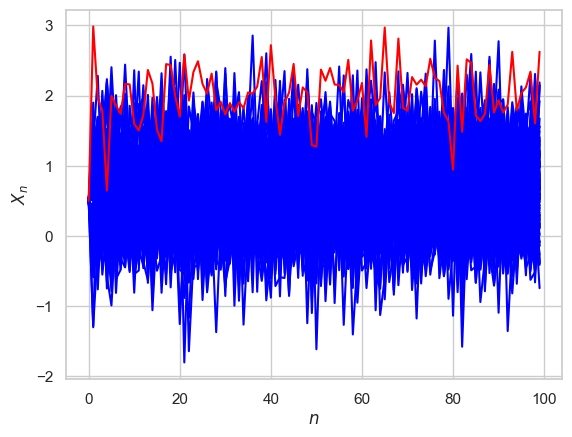

In [18]:
# Plot regular trajectories
for i, trajectory in enumerate(regular_arch_trajectories):
    plt.plot(trajectory, color="blue")

plt.plot(anomalous_constant_mean_arch_trajectories[0], color="red", alpha=1)

plt.xlabel(r"$n$")
plt.ylabel(r"$X_n$")
plt.show()